In [1]:
import random
import json
from PIL import Image

import matplotlib.pyplot as plt
import numpy as np

from state import State

In [2]:
def get_string_entry(question : str) -> str:
    """
    Prompt the user with a question and retrieve a string entry.

    Args:
        question (str): The question to prompt the user with.

    Returns:
        str: The string value entered by the user.
    """

    print(question)
    return input("Enter Selection >> ")

def get_int_entry(question : str) -> int:
    """
    Prompt the user with a question and retrieve an integer entry.

    Args:
        question (str): The question to prompt the user with.

    Returns:
        int: The integer value entered by the user.

    Raises:
        ValueError: If the user does not input a valid integer.
    """

    print(question)
    try:
        selection = int(input("Enter Value >> "))
        return selection
    except ValueError:
        print("Invalid entry.  Please specify a number.")
        return None

def is_null_or_whitespace(value : str) -> bool:
    """
    Checks if a string is None or consists only of whitespace characters.

    Args:
        value (str): The string to be checked.

    Returns:
        bool: True if the string is None or consists only of whitespace characters, False otherwise.
    """

    if value is None or len(value.strip()) == 0:
        return True

    return False

def get_yes_no(question : str) -> bool:
    """
    Prompt the user with a question and 
    return True if the user responds with 'yes' or 'y', False if 'no' or 'n'.

    Args:
        question (str): The question to prompt the user with.

    Returns:
        bool: True if the user answers affirmatively ('yes' or 'y'), False otherwise ('no' or 'n').
    """

    print(question)
    valid_options = ['yes', 'y', 'n', 'no']
    user_selection = input("Enter Selection >> ").lower()
    if user_selection in valid_options[:2]:
        return True
    if user_selection in valid_options[2:]:
        return False

    print("Invalid Selection")
    return None

def sort_by_name(states) -> list:
    return sorted(states, key=lambda x: x.name.lower())

def sort_by_pop(states) -> list:
    return sorted(states, key=lambda x: x.population, reverse=True)

Name : Minnesota
Abbreviation : MN
Population : 5,761,530
Flower : Pink and white lady's slipper



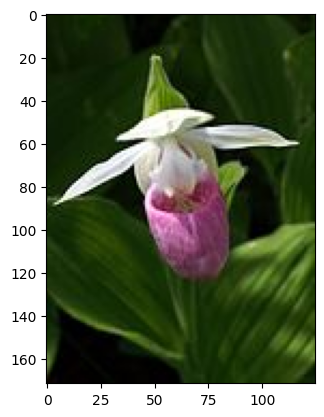

In [3]:
def main():
    states = []
    j_data = {}
    with open('../state_data.json', 'r', encoding="utf-8") as i_file:
        j_data = json.load(i_file)

    for s in j_data:
        state = State()
        state.set_name(s['state'])
        state.population = int(s['population'])
        state.flower = s['flower']
        states.append(state)

    # print(states)
    # print(sort_by_name(states))
    # print(sort_by_pop(states))
    states = sort_by_pop(states)
    
    rand_state = random.choice(states)
    print(rand_state)
    img = np.asarray(Image.open('../' + rand_state.flower_path))
    plt.imshow(img)

main()